












































































































































































































































## Introdução à Classificação com KNN
---
Uma tarefa fundamental no aprendizado de máquina é a classificação. Neste capítulo, exploraremos um modelo de classificação supervisionada: o K-Nearest Neighbors(KNN) disponível na biblioteca scikit-learn

### O que é o KNN?

O modelo de dados KNN(K-Nearest-Neighbors), ou K Vizinhos Mais Próximos, é um algoritmo de classificação e regressão supervisionado da área de aprendizado de máquina (machine learning)

### Como funcioan o KNN (em classificação)

    - 1. Treinamento: O KNN não aprende de verdade durante o treinamento. Ele apenas armazena os dados de treinamento.
    - 2. Predição (classificação)

### Exemplo prático:

In [13]:
# Realizando os imports necessários

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [74]:
# criando um dataset exemplo

df = pd.read_csv('./frutas_dataset.csv')

In [75]:
# visualizando os dados

df.head()

,peso,textura,fruta
0,156,lisa,maçã
1,132,rugosa,laranja
2,136,rugosa,laranja
3,135,lisa,maçã
4,153,lisa,maçã


In [76]:
df.tail()

,peso,textura,fruta
95,147,lisa,maçã
96,154,lisa,maçã
97,158,lisa,maçã
98,158,lisa,maçã
99,163,lisa,maçã


In [77]:
df.shape

(100, 3)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   peso     100 non-null    int64 
 1   textura  100 non-null    object
 2   fruta    100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [79]:
df.describe(
    
)

,peso
count,100.000000
mean,147.640000
std,13.250897
min,116.000000
25%,138.000000
50%,147.000000
75%,158.000000
max,180.000000


In [80]:
df.value_counts()

peso  textura  fruta  
158   lisa     maçã       7
138   rugosa   laranja    5
130   rugosa   laranja    4
147   lisa     maçã       4
163   lisa     maçã       4
152   lisa     maçã       3
143   rugosa   laranja    3
154   rugosa   maçã       3
153   lisa     maçã       3
159   lisa     maçã       3
160   lisa     maçã       3
157   lisa     maçã       3
156   lisa     maçã       3
143   lisa     maçã       3
136   rugosa   laranja    3
133   rugosa   laranja    2
148   lisa     maçã       2
139   lisa     maçã       2
141   lisa     maçã       2
126   rugosa   laranja    2
127   rugosa   laranja    2
155   lisa     maçã       2
170   lisa     maçã       2
140   rugosa   laranja    1
137   rugosa   laranja    1
131   rugosa   laranja    1
140   lisa     maçã       1
135   rugosa   laranja    1
      lisa     maçã       1
128   rugosa   laranja    1
129   rugosa   laranja    1
125   rugosa   laranja    1
123   rugosa   laranja    1
116   rugosa   laranja    1
132   rugosa   laranja   

In [81]:
df['fruta'].value_counts()

fruta
maçã       66
laranja    34
Name: count, dtype: int64

In [82]:
df_dados = df.copy()

# Tratamento as variaveis object

lb = LabelEncoder()

for variavel in ['textura', 'fruta']:
    df_dados[variavel] = lb.fit_transform(df_dados[variavel])

df_dados

,peso,textura,fruta
0,156,0,1
1,132,1,0
2,136,1,0
3,135,0,1
4,153,0,1
...,...,...,...
95,147,0,1
96,154,0,1
97,158,0,1
98,158,0,1


In [83]:
# Avaliando correlaçao das variaveis preditivas
df_dados.corr()

,peso,textura,fruta
peso,1.000000,-0.722140,0.766555
textura,-0.722140,1.000000,-0.936563
fruta,0.766555,-0.936563,1.000000


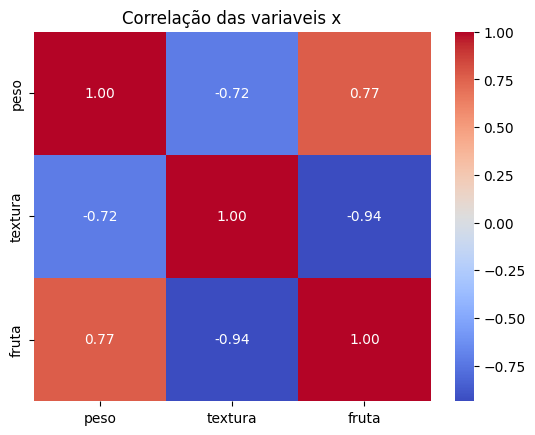

In [84]:
# correlação de forma grafica

sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variaveis x')
plt.show()

In [85]:
correlacao_com_alvo = df_dados.corr(numeric_only=True)['fruta'].sort_values(ascending=False)

display(correlacao_com_alvo)

fruta      1.000000
peso       0.766555
textura   -0.936563
Name: fruta, dtype: float64

### Preparando os dados para treinamento


- Devemos separar os dados preditivos da variável alvo
- Também separamos 70% dos dados para treinamento e 30% para validação

In [86]:
# Separando preditoras da target
# se eu colocar df_dados['fruta'] no display vai me dar 0 ou 1, se eu colocar df['fruta'] vai aparecer no display o nome maça ou laranja
variaveis_x = df_dados.drop('fruta', axis=1)

variavel_y = df['fruta']

display(variavel_y)

0        maçã
1     laranja
2     laranja
3        maçã
4        maçã
       ...   
95       maçã
96       maçã
97       maçã
98       maçã
99       maçã
Name: fruta, Length: 100, dtype: object

In [87]:
# Separando os dados em treino e teste, esse random_state é para fazer a auditoria depois, pega dez,
#  quando eu pegar de novo, voce vai me forncecer esses mesmo 10 escolhidos antes, é uma chave de criptografia

x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=10)

In [88]:
# Treinando o modelo

modelo = KNeighborsClassifier(n_neighbors=1)

modelo.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [89]:
print(len(x_treino))
print(len(x_teste))

70
30


In [90]:
# testando o modelo com as variaves separadas para teste

resultado_teste = modelo.predict(x_teste)

print(x_teste)

    peso  textura
19   140        0
14   156        0
43   143        1
37   180        0
66   139        0
3    135        0
79   148        0
41   143        0
38   133        1
68   158        0
2    136        1
1    132        1
60   147        0
53   130        1
95   147        0
74   138        1
92   133        1
26   152        0
59   170        0
46   169        0
90   163        0
70   123        1
50   125        1
44   163        0
76   128        1
55   136        1
21   158        0
61   152        0
6    170        0
63   143        0


In [91]:
# verificando a acurácia 
score = accuracy_score(y_teste, resultado_teste)

score

0.9666666666666667

não existe modelo que tenha 100% por que senão ele estaria decorando, então tá muito perto do 100 não é bom

In [92]:
for comparacao in zip(y_teste, resultado_teste):
    print(comparacao)

('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')


In [93]:
# tentando prever uma nova fruta:

fruta_nova = [[150, 1]]

resposta = modelo.predict(fruta_nova)

print(resposta)

['maçã']


c:\Users\aluno.manha\Desktop\projetos\Curso-IA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [94]:
from sklearn.model_selection import cross_val_score

accuracia = []

k_values = range(1,31)

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='accuracy')
    accuracia.append(scores.mean())

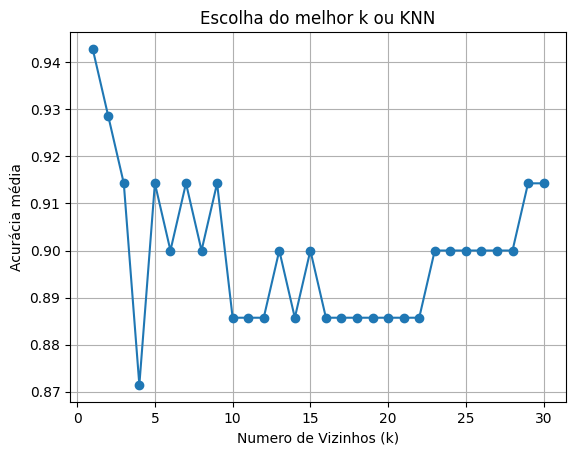

In [ ]:
plt.plot(k_values, accuracia, marker ='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia média')
plt.title('Escolha do melhor k ou KNN')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# Criando o Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Opcional: transformar rótulos numéricos em nomes das espécies
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.shape

(150, 6)

In [9]:
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target  species  
5.8                2.7               5.1                1.9               2       virginica    2
4.4                2.9               1.4                0.2               0       setosa       1
                   3.0               1.3                0.2               0       setosa       1
                   3.2               1.3                0.2               0       setosa       1
4.3                3.0               1.1                0.1               0       setosa       1
                                                                                              ..
7.7                2.6               6.9                2.3               2       virginica    1
                   2.8               6.7                2.0               2       virginica    1
                   3.0               6.1                2.3               2       virginica    1
                   3.8             

In [10]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [29]:
df_train = df.copy()



In [30]:
df.drop('species', axis=1, inplace= True)

In [31]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [32]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


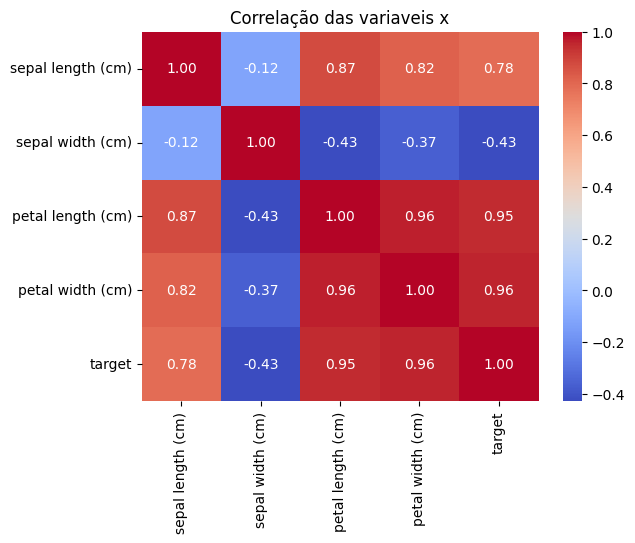

In [34]:
# correlação de forma grafica

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das variaveis x')
plt.show()

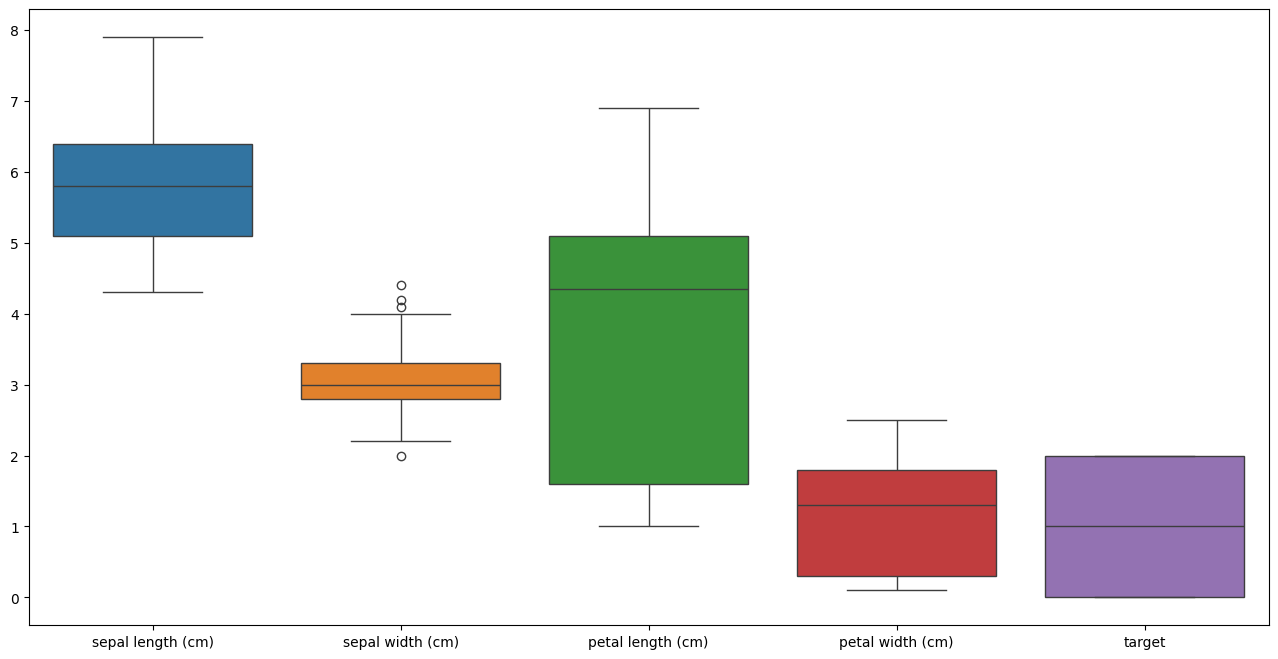

In [35]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df)

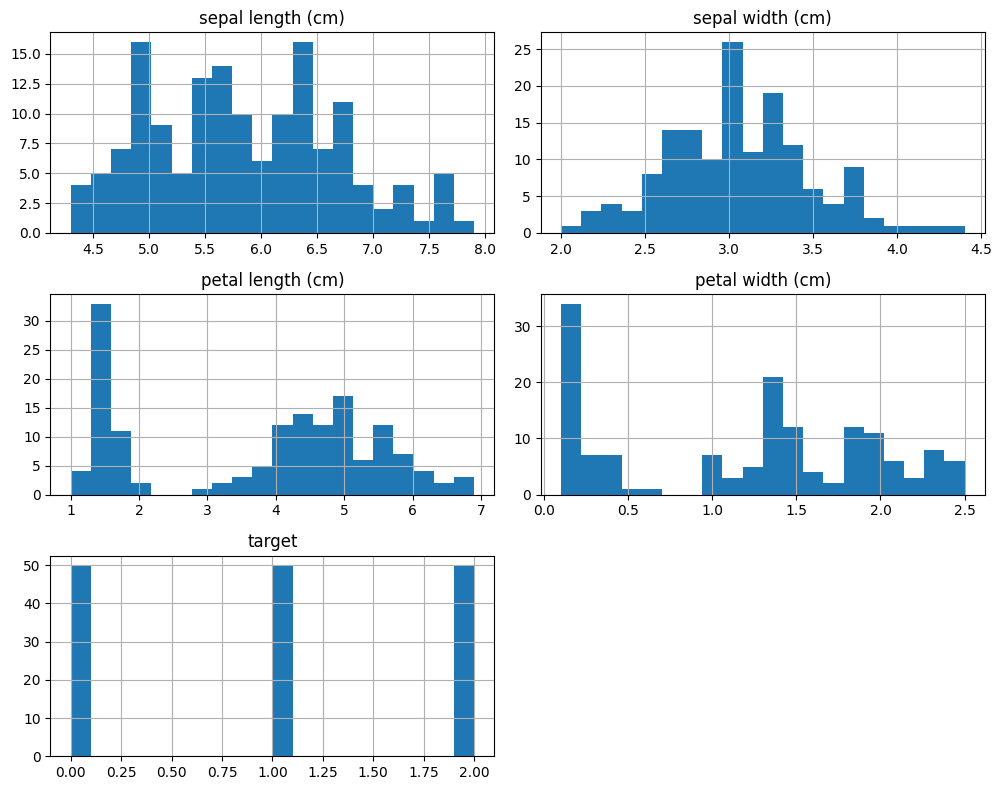

In [36]:

df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()  # Ajusta o layout para que os gráficos não se sobreponham
plt.show()

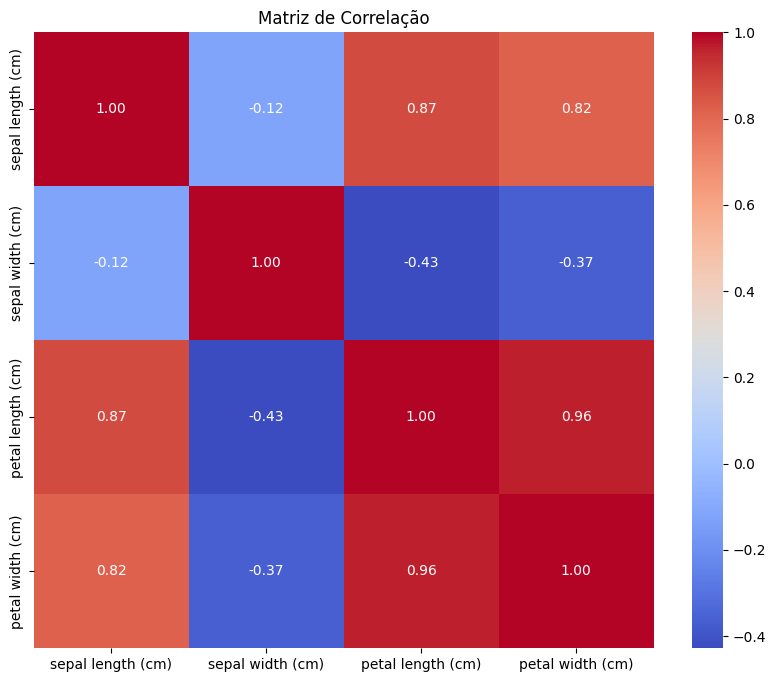

In [ ]:

corr_matrix = df.drop(columns=['target']).corr()

#  correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


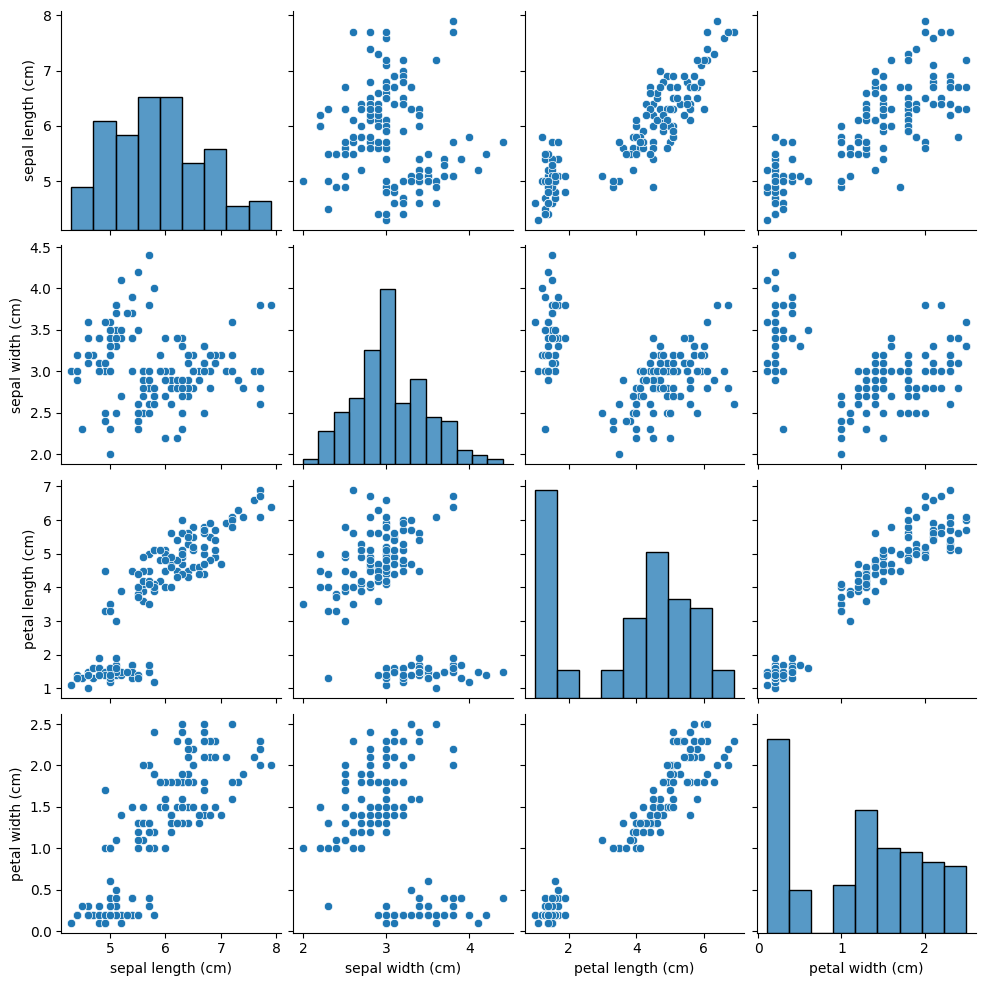

In [78]:
# Pairplot para visualizar a relação entre todas as variáveis
sns.pairplot(df.drop(columns=['target']))
plt.show()


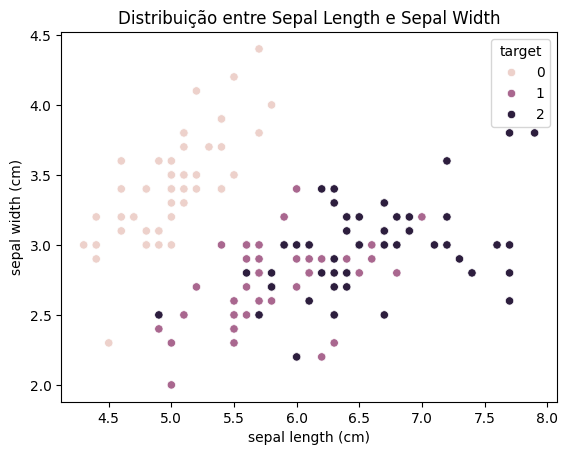

In [79]:
# Scatterplot entre 'sepal length' e 'sepal width'
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['target'])
plt.title('Distribuição entre Sepal Length e Sepal Width')
plt.show()


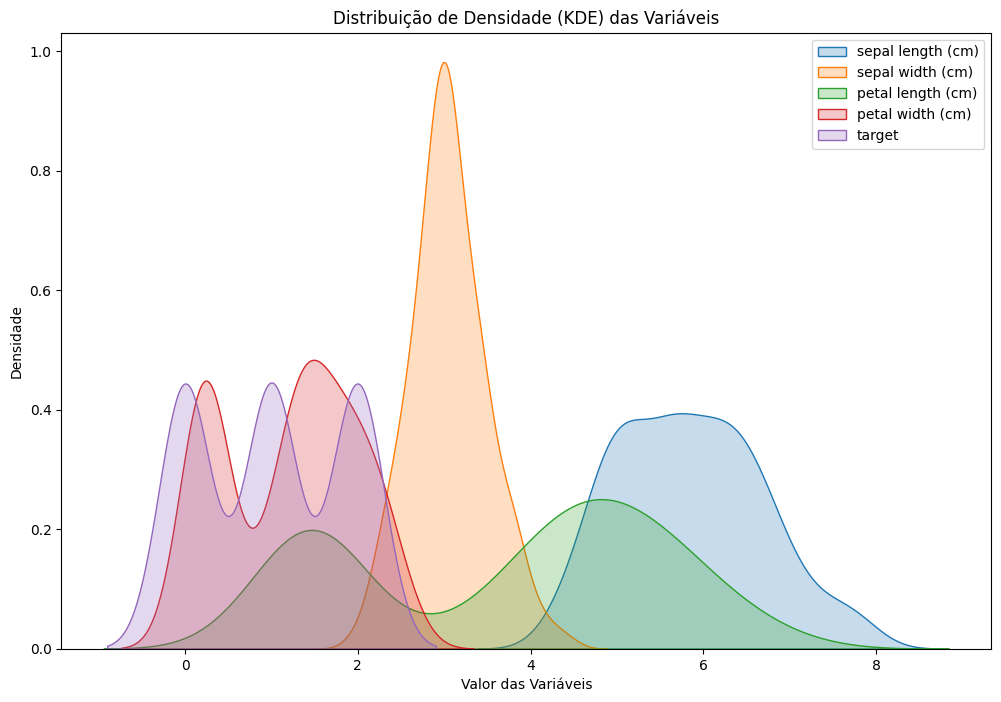

In [ ]:

plt.figure(figsize=(12, 8))


for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(df[column], fill=True, label=column)


plt.title('Distribuição de Densidade (KDE) das Variáveis')
plt.xlabel('Valor das Variáveis')
plt.ylabel('Densidade')
plt.legend()

plt.show()


In [83]:
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")

Limite Inferior: 2.05
Limite Superior: 4.05


In [84]:

df_sem_outliers = df[(df['sepal width (cm)'] >= limite_inferior) & (df['sepal width (cm)'] <= limite_superior)]

print(f"Linhas antes: {len(df)}")
print(f"Linhas depois: {len(df_sem_outliers)}")

# Verificando as primeiras linhas do DataFrame sem outliers
print(df_sem_outliers.head())

Linhas antes: 150
Linhas depois: 146
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [86]:
df_sem_outliers.shape

(146, 5)

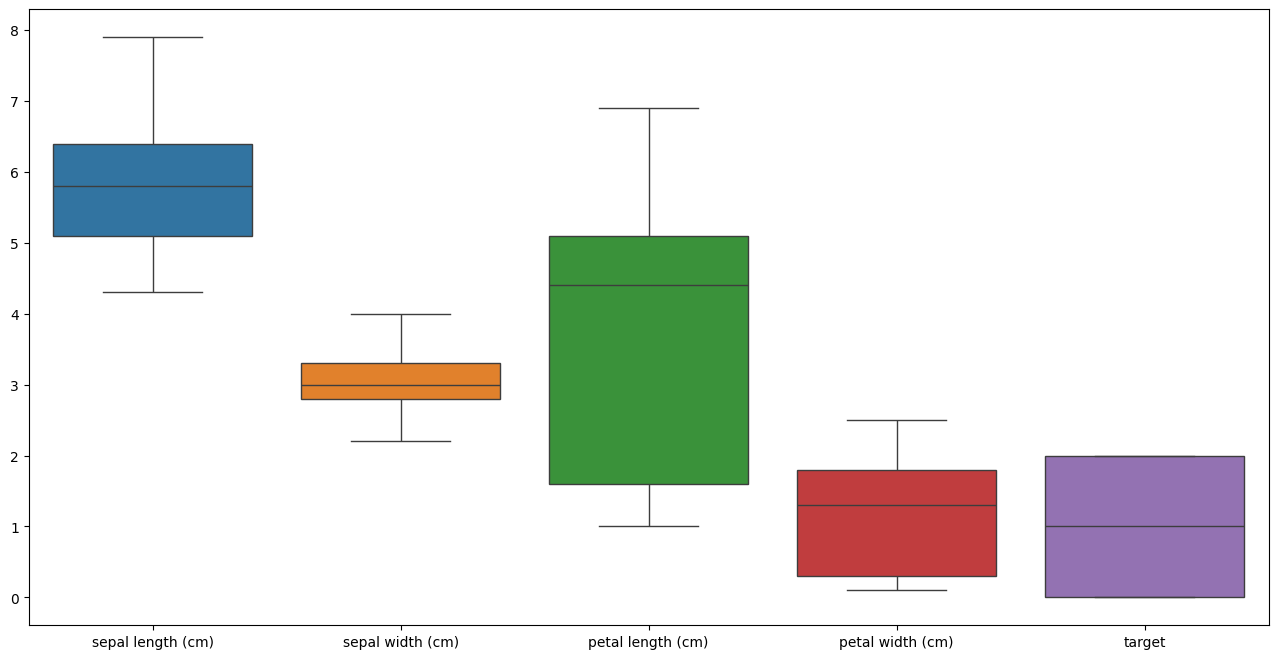

In [87]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_sem_outliers)

In [37]:
# vamos fazer a padronização dos dados
padronizar = StandardScaler().fit(df)

df_padronizado = padronizar.transform(df)

In [40]:
df_padronizado = pd.DataFrame(df_padronizado)

df_padronizado.columns = df.columns

In [41]:
df_padronizado

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


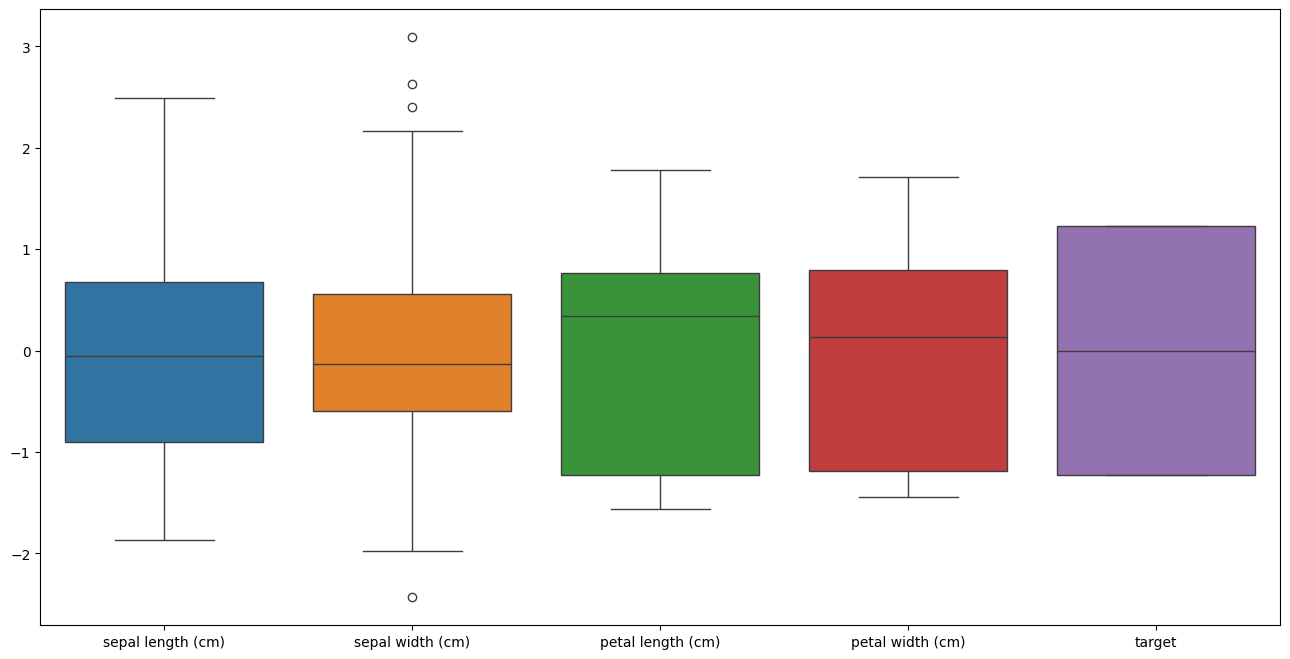

In [42]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_padronizado)

In [44]:
df_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [71]:
from sklearn.model_selection import cross_val_score

accuracia = []

k_values = range(1,31)

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='accuracy')
    accuracia.append(scores.mean())

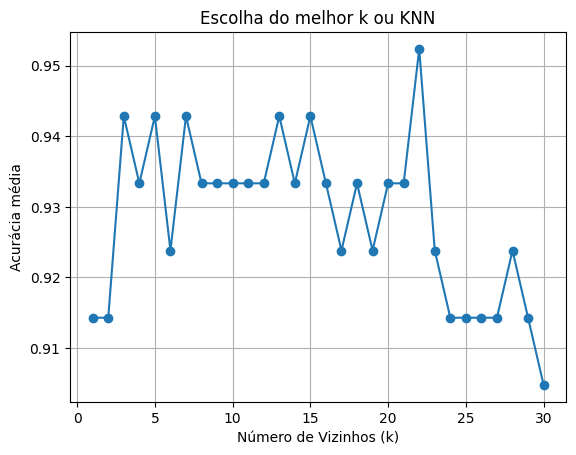

In [72]:
plt.plot(k_values, accuracia, marker ='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia média')
plt.title('Escolha do melhor k ou KNN')
plt.grid(True)
plt.show()

In [ ]:
# Há outliers na coluna sepal wisth(cm), precisamos retirá-los
# Calcular o primeiro e o terceiro quartil (Q1 e Q3)
# Q1 = df_padronizado['sepal width (cm)'].quantile(0.25)
# Q3 = df['sepal width (cm)'].quantile(0.75)

# Calcular o IQR (Intervalo Interquartil)
# IQR = Q3 - Q1

# Definir os limites inferior e superior para os outliers
# limite_inferior = Q1 - 1.5 * IQR
# limite_superior = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover as linhas que possuem valores fora desses limites
# df_sem_outliers = df_padronizado[(df['sepal width (cm)'] >= limite_inferior) & (df['sepal width (cm)'] <= limite_superior)]

# Verificando o DataFrame sem outliers
# df_sem_outliers.head()


In [50]:
# Separando preditoras da target

variaveis_x = df_padronizado.drop('target', axis=1)

variavel_y = df['target']

display(variavel_y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [51]:
x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=10)

In [52]:
# Treinando o modelo

modelo = KNeighborsClassifier(n_neighbors=1)

modelo.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [53]:
# testando o modelo com as variaves separadas para teste

resultado_teste = modelo.predict(x_teste)

print(x_teste)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87            0.553333         -1.743357           0.364896          0.132510
111           0.674501         -0.822570           0.876433          0.922303
10           -0.537178          1.479398          -1.283389         -1.315444
91            0.310998         -0.131979           0.478571          0.264142
49           -1.021849          0.558611          -1.340227         -1.315444
60           -1.021849         -2.433947          -0.146641         -0.262387
72            0.553333         -1.282963           0.649083          0.395774
67           -0.052506         -0.822570           0.194384         -0.262387
39           -0.900681          0.788808          -1.283389         -1.315444
55           -0.173674         -0.592373           0.421734          0.132510
66           -0.294842         -0.131979           0.421734          0.395774
142          -0.052506         -0.822570           0.762758     

In [54]:
# verificando a acurácia 
score = accuracy_score(y_teste, resultado_teste)

score

0.9777777777777777

In [ ]:
# vamos fazer agora a normalização, vamos verificar o dataset de antes
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
normalizar = MinMaxScaler().fit(df)



In [58]:
df_normalizado = normalizar.transform(df)

In [61]:
df_normalizado = pd.DataFrame(df_normalizado, columns=df.columns)

In [62]:
df_normalizado

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


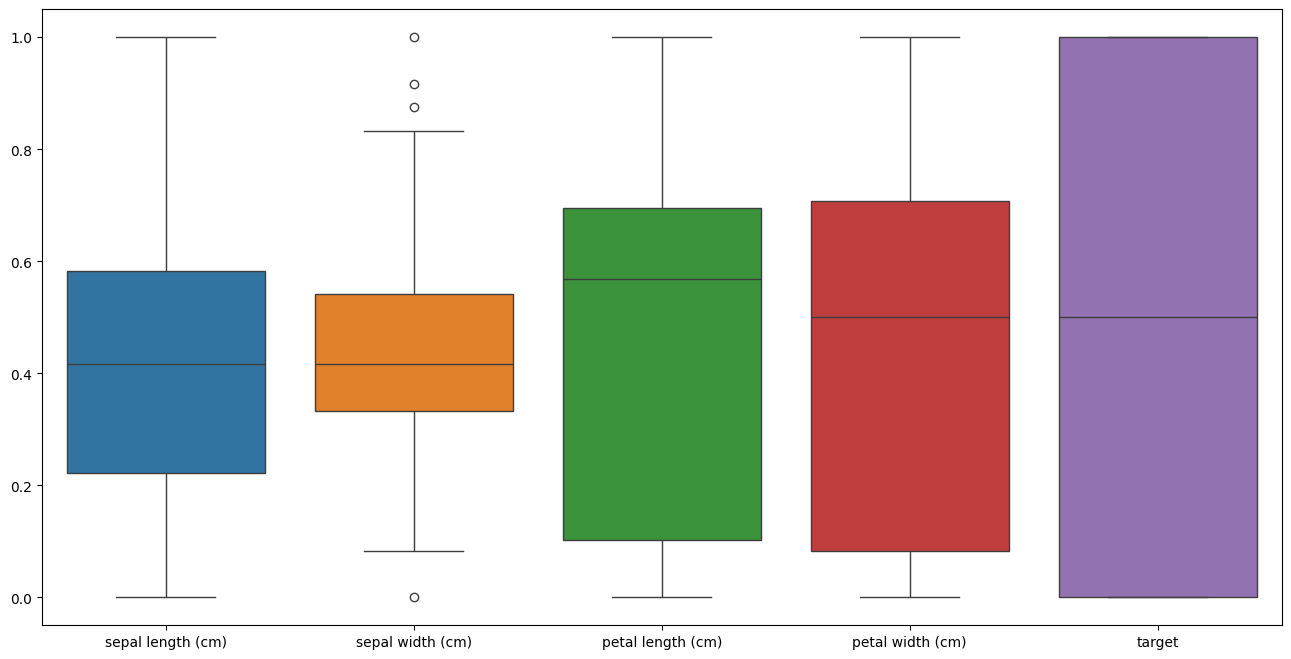

In [63]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_normalizado)

In [73]:
from sklearn.model_selection import cross_val_score

accuracia = []

k_values = range(1,31)

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='accuracy')
    accuracia.append(scores.mean())

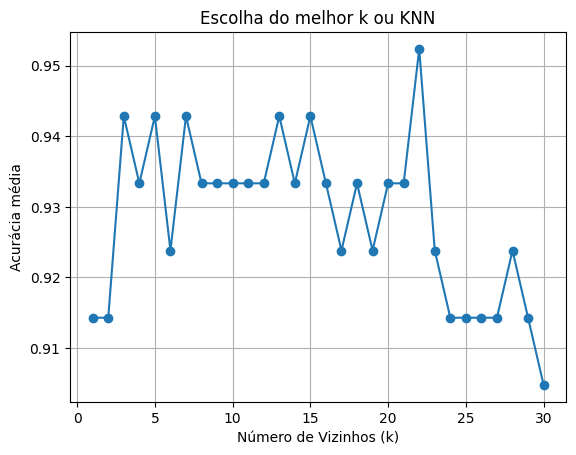

In [74]:
plt.plot(k_values, accuracia, marker ='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia média')
plt.title('Escolha do melhor k ou KNN')
plt.grid(True)
plt.show()

In [65]:
# Separando preditoras da target

variaveis_x = df_normalizado.drop('target', axis=1)

variavel_y = df['target']

display(variavel_y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [66]:
x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=10)

In [67]:
# Treinando o modelo

modelo = KNeighborsClassifier(n_neighbors=1)

modelo.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [68]:
# testando o modelo com as variaves separadas para teste

resultado_teste = modelo.predict(x_teste)

print(x_teste)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87            0.555556          0.125000           0.576271          0.500000
111           0.583333          0.291667           0.728814          0.750000
10            0.305556          0.708333           0.084746          0.041667
91            0.500000          0.416667           0.610169          0.541667
49            0.194444          0.541667           0.067797          0.041667
60            0.194444          0.000000           0.423729          0.375000
72            0.555556          0.208333           0.661017          0.583333
67            0.416667          0.291667           0.525424          0.375000
39            0.222222          0.583333           0.084746          0.041667
55            0.388889          0.333333           0.593220          0.500000
66            0.361111          0.416667           0.593220          0.583333
142           0.416667          0.291667           0.694915     

In [69]:
# verificando a acurácia 
score = accuracy_score(y_teste, resultado_teste)

score

0.9777777777777777